In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
import plotly.io as pio

In [96]:
base_planos = pd.read_csv('dataBases/plano_saude.csv')
base_planos

,idade,custo
0,18,871
1,23,1100
2,25,1393
3,33,1654
4,34,1915
5,43,2100
6,48,2356
7,51,2698
8,58,2959
9,63,3000


In [97]:
# Calculo de regressao linear manual

def PrevisaoRegressaoLinear(x, y, v):
    y = np.array(y)
    x = np.array(x)

    cov_xy = np.corrcoef(x, y)[0,1]
    inclinacao = cov_xy*(np.std(y) / np.std(x))
    interseccao = np.mean(y) - inclinacao * np.mean(x)
    previsao = interseccao + inclinacao * v
    return float(previsao)

In [98]:
x = base_planos['idade']
y = base_planos['custo']

lr = PrevisaoRegressaoLinear(x, y, 54)
lr

2657.3594760672704

In [99]:
np.corrcoef(y, x)

array([[1.        , 0.98790395],
       [0.98790395, 1.        ]])

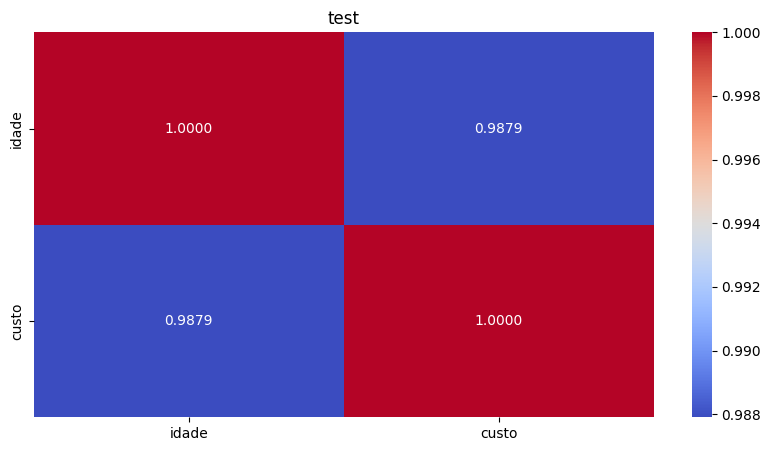

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(base_planos.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title("test")
plt.show()

In [101]:
x = x.values.reshape(-1,1)
x.shape

(11, 1)

In [102]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x, y)
# função fit é feita para treinar o algoritmo com os dados reais, com seus paramentros
# = true, pornto de interceccao
# copy = True, esta salvando os valores de x, para nao se perder durante o treinamento
# n_jobs, diz quantos núcleos irá ser usado
# posivite - retorna valores nao negativos
# existem dados de treino e dados de teste


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
regressor_plano_saude.intercept_

149.05772962483752

In [104]:
regressor_plano_saude.coef_

array([46.45003234])

In [105]:
previsoes = regressor_plano_saude.predict(x)
previsoes

array([ 985.15831177, 1217.40847348, 1310.30853816, 1681.9087969 ,
       1728.35882924, 2146.40912031, 2378.65928202, 2518.00937904,
       2843.15960543, 3075.40976714, 3261.20989651])

In [106]:
grafico = px.scatter(x = x.ravel(), y = y)
grafico.add_scatter(x = x.ravel(), y = previsoes, name = 'Regressão')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': 'EhcZISIrMDM6P0M=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': 'ZwNMBHEFdgZ7BzQINAmKCo8LuAscDA==', 'dtype': 'i2'},
              'yaxis': 'y'},
             {'name': 'Regressão',
              'type': 'scatter',
              'x': {'bdata': 'EhcZISIrMDM6P0M=', 'dtype': 'i1'},
              'y': {'bdata': ('UmX2OETJjkCjNt9GogWTQKCebfE7eZ' ... 'dRNqZAOKv/zNEGqEA1E453a3qpQA=='),
                    'dtype': 'f8'}}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [108]:
previsao_54 = regressor_plano_saude.predict([[54]])
print(f"A regressao para 54 anos é: {previsao_54[0]:.2f}")

A regressao para 54 anos é: 2657.36


In [110]:
regressor_plano_saude.score(x.reshape(-1,1), y)

0.9759542217686598